# **Actividad práctica: Bases de Python - Elección de Datasets potenciales**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, f_oneway
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, KBinsDiscretizer
from sklearn.feature_selection import (
    SelectFromModel, SelectKBest, chi2, f_regression,
    mutual_info_classif, RFE, RFECV
)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Ignacio-Juez/Data_Set/refs/heads/main/ecommerce_dataset_updated%20(1).csv')

In [ ]:
df.head()

,User_ID,Product_ID,Category,Price (Rs.),Discount (%),Final_Price(Rs.),Payment_Method,Purchase_Date
0,337c166f,f414122f-e,Sports,36.53,15,31.05,Net Banking,12-11-2024
1,d38a19bf,fde50f9c-5,Clothing,232.79,20,186.23,Net Banking,09-02-2024
2,d7f5f0b0,0d96fc90-3,Sports,317.02,25,237.76,Credit Card,01-09-2024
3,395d4994,964fc44b-d,Toys,173.19,25,129.89,UPI,01-04-2024
4,a83c145c,d70e2fc6-e,Beauty,244.80,20,195.84,Net Banking,27-09-2024


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           3660 non-null   object 
 1   Product_ID        3660 non-null   object 
 2   Category          3660 non-null   object 
 3   Price (Rs.)       3660 non-null   float64
 4   Discount (%)      3660 non-null   int64  
 5   Final_Price(Rs.)  3660 non-null   float64
 6   Payment_Method    3660 non-null   object 
 7   Purchase_Date     3660 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 228.9+ KB


In [ ]:
df.describe()

,Price (Rs.),Discount (%),Final_Price(Rs.)
count,3660.000000,3660.000000,3660.000000
mean,254.800675,18.825137,206.906579
std,141.682621,14.731338,122.687844
min,10.090000,0.000000,5.890000
25%,134.012500,5.000000,104.512500
50%,253.845000,15.000000,199.185000
75%,377.595000,25.000000,304.117500
max,499.960000,50.000000,496.820000


In [ ]:
missing_values = df.isnull().sum()
print("Valores perdidos por columna:\n", missing_values)

Valores perdidos por columna:
 User_ID             0
Product_ID          0
Category            0
Price (Rs.)         0
Discount (%)        0
Final_Price(Rs.)    0
Payment_Method      0
Purchase_Date       0
dtype: int64


Las variables más interesantes del dataset para analizar y describir son:

**User_ID:** Permite identificar patrones de usuarios frecuentes o leales y clasificar a los usuarios según su gasto promedio.
**Product_ID: **Es útil para analizar cuáles son los productos más o menos vendidos, además de relacionarlos con los descuentos aplicados y sus precios finales.
**Price:** Ayuda a identificar los rangos de precios más comunes entre las compras realizadas.
**Discount: **Facilita el estudio del impacto de los descuentos en las ventas y su relación con categorías o productos específicos.
**Payment_Method:** Permite analizar las preferencias de los usuarios en cuanto a los métodos de pago utilizados.
**Purchase_Date: **Ayuda a identificar patrones temporales de compra y a evaluar el impacto de campañas o eventos promocionales.

# **Práctica integradora: Visualizaciones en Python**

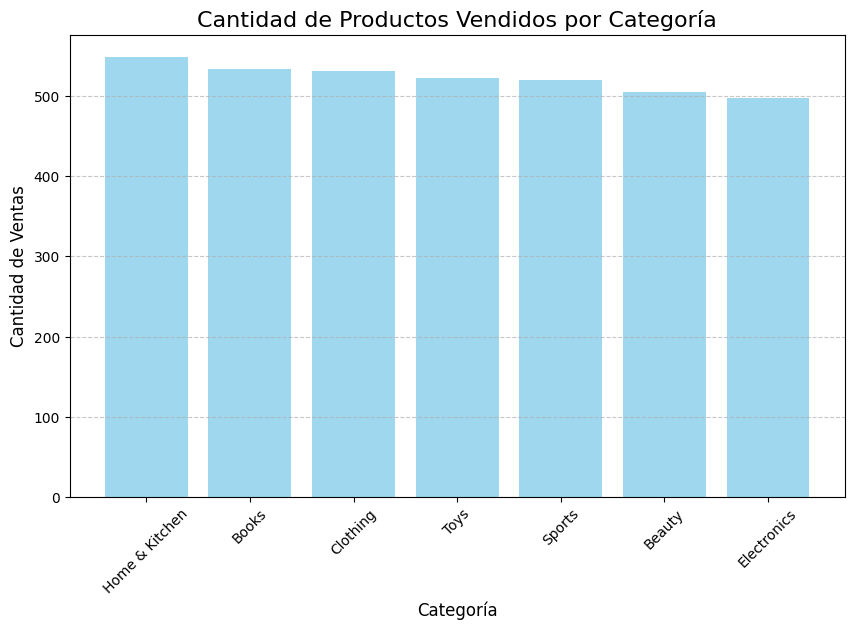

In [ ]:
#Categorías más vendidas:
category_counts = df['Category'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(category_counts.index, category_counts.values, color='skyblue', alpha=0.8)
plt.title('Cantidad de Productos Vendidos por Categoría', fontsize=16)
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Cantidad de Ventas', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()


Este gráfico permite identificar qué categorías son más populares, permitiendo crear estrategias de promociones o campañas.

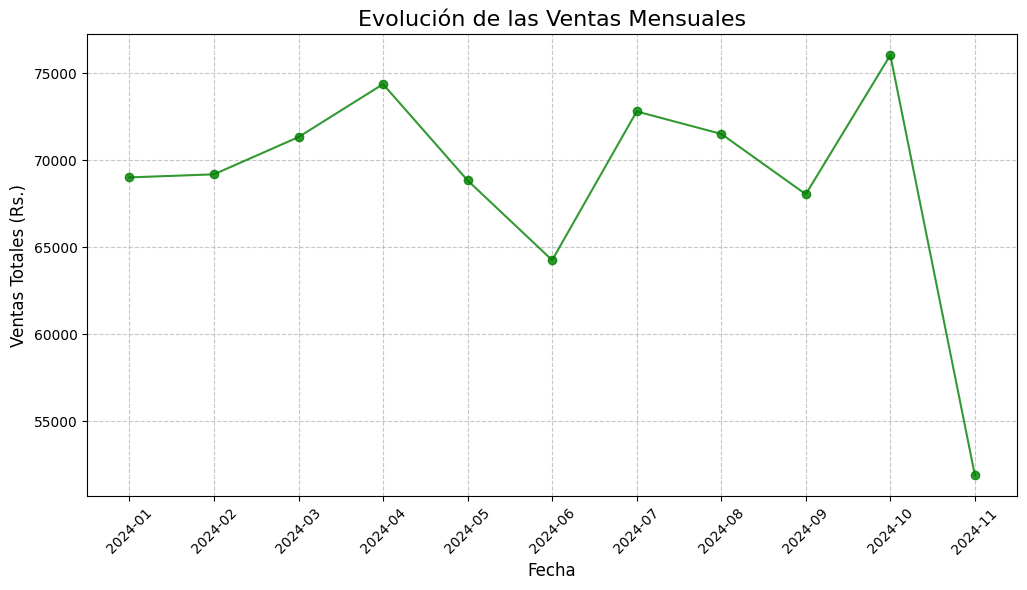

In [ ]:
#Ventas a lo largo del tiempo:
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'], format="%d-%m-%Y")
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'])
sales_over_time = df.groupby(df['Purchase_Date'].dt.to_period('M'))['Final_Price(Rs.)'].sum()

plt.figure(figsize=(12, 6))
plt.plot(sales_over_time.index.astype(str), sales_over_time.values, marker='o', color='green', alpha=0.8)
plt.title('Evolución de las Ventas Mensuales', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Ventas Totales (Rs.)', fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()


Este gráfico ayuda a identificar tendencias o picos en las ventas, relacionados con campañas, eventos promocionales, vacaciones y fiestas.

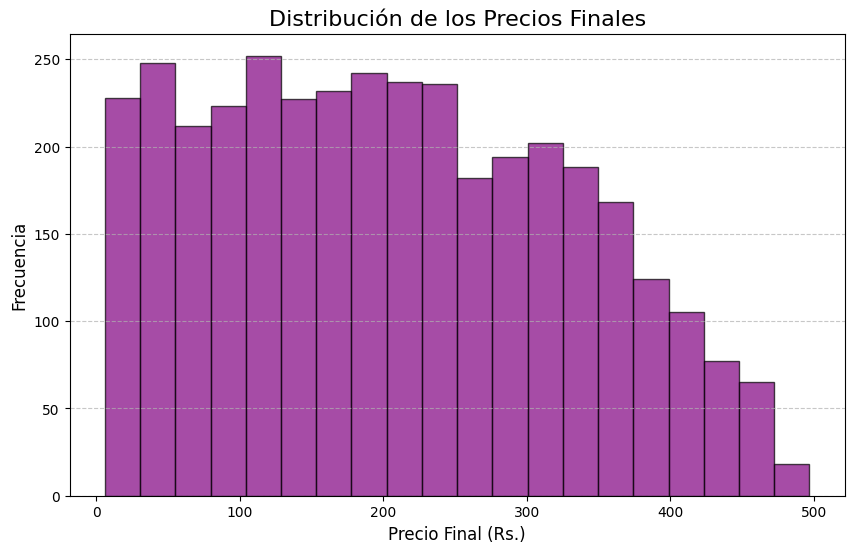

In [ ]:
#Distribucíon de precios finales:
plt.figure(figsize=(10, 6))
plt.hist(df['Final_Price(Rs.)'], bins=20, color='purple', alpha=0.7, edgecolor='black')
plt.title('Distribución de los Precios Finales', fontsize=16)
plt.xlabel('Precio Final (Rs.)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Este gráfico muestra los rangos de precios más frecuentes en las ventas, proporcionando información sobre la relación de los clientes al precio.

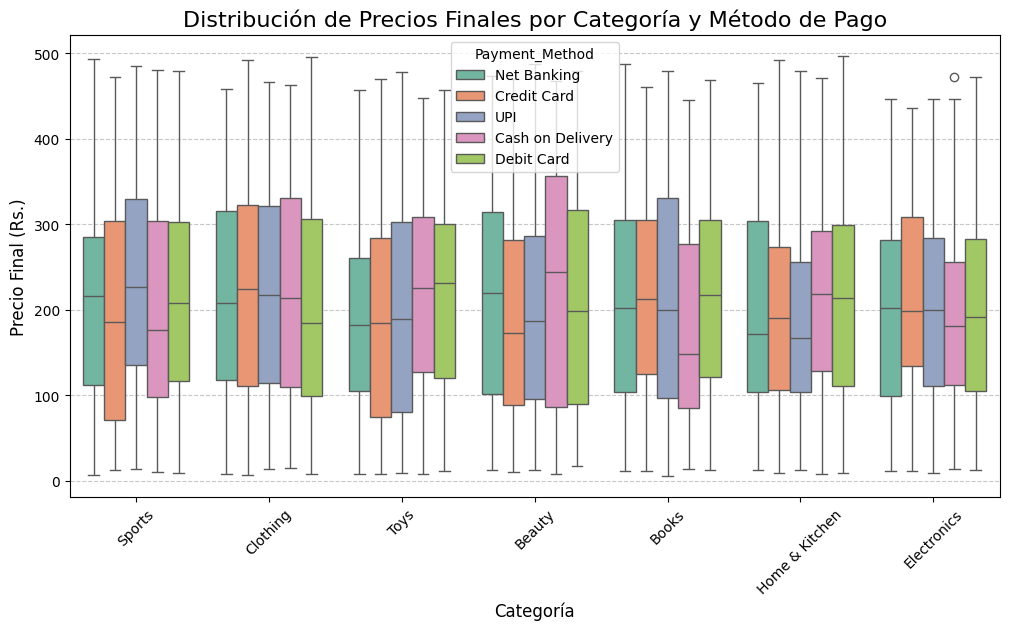

In [ ]:
# Comparación de precios por categoría
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Final_Price(Rs.)', hue='Payment_Method', data=df, palette='Set2')
plt.title('Distribución de Precios Finales por Categoría y Método de Pago', fontsize=16)
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Precio Final (Rs.)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



 Este gráfico permite comparar los rangos de precios por categoría, identificando categorías de mayor o menor valor promedio, así como los métodos de pago en dichas categorías.

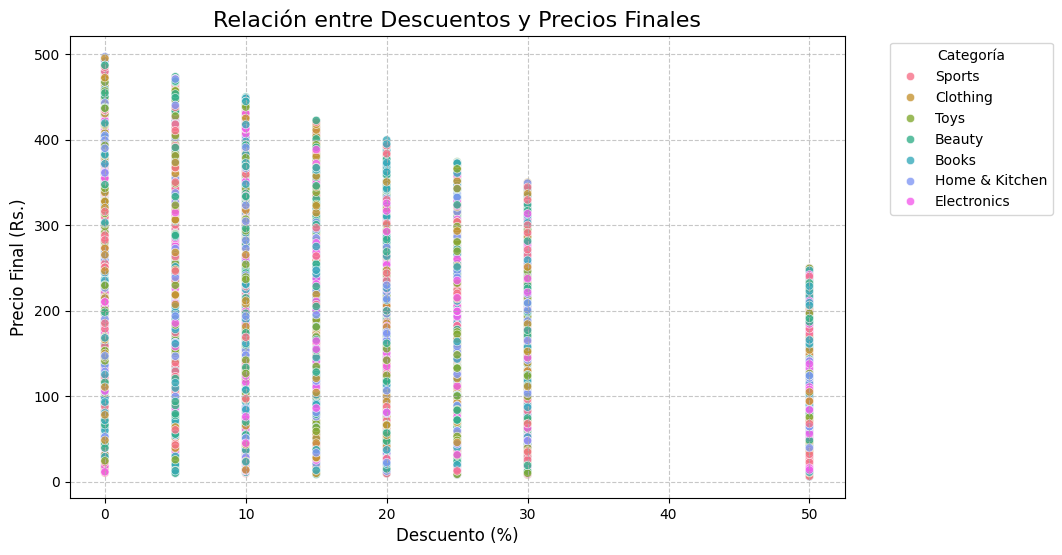

In [ ]:
#Relación entre Descuentos y Precios Finales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount (%)', y='Final_Price(Rs.)', hue='Category', data=df, palette='husl', alpha=0.8)
plt.title('Relación entre Descuentos y Precios Finales', fontsize=16)
plt.xlabel('Descuento (%)', fontsize=12)
plt.ylabel('Precio Final (Rs.)', fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Permite identificar si los mayores descuentos están asociados con productos de alto o bajo valor y su distribución por categoría.

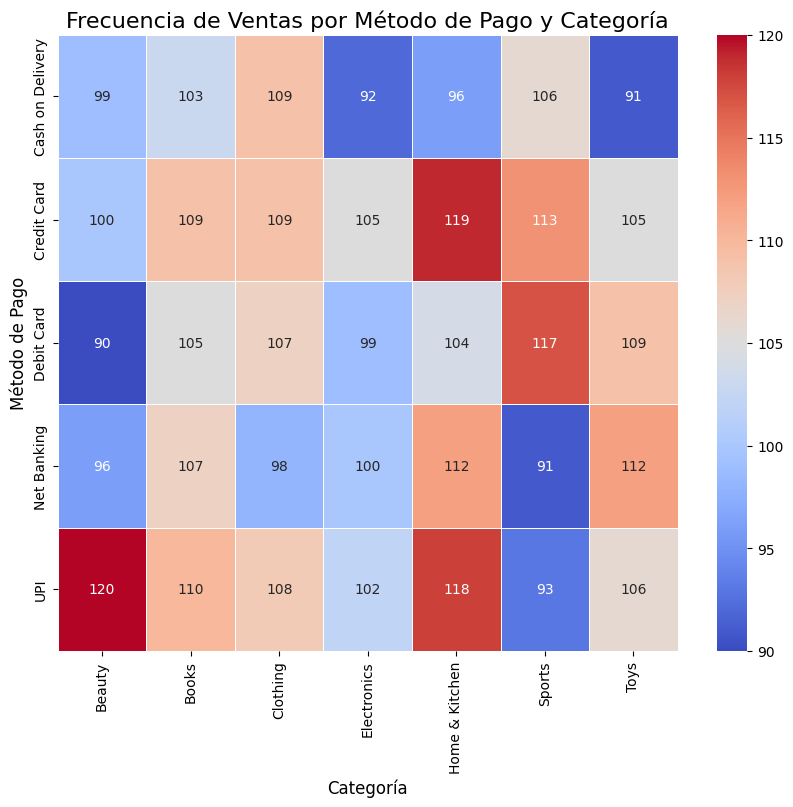

In [ ]:
#Frecuencia de Ventas por Método de Pago y Categoría
payment_category = df.pivot_table(index='Payment_Method', columns='Category', values='Final_Price(Rs.)', aggfunc='count')

plt.figure(figsize=(10, 8))
sns.heatmap(payment_category, annot=True, fmt=".0f", cmap='coolwarm', linewidths=0.5)
plt.title('Frecuencia de Ventas por Método de Pago y Categoría', fontsize=16)
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Método de Pago', fontsize=12)
plt.show()


Ayuda a identificar qué métodos de pago son más populares para distintas categorías, serviría para orientar decisiones de marketing.

# **1° Entrega**
En este proyecto estaré analizando los datos provenientes de un e-commerce ubicado en la India, país de origen del método de pago UPI. El UPI (Unified Payments Interface) es un sistema de pagos en tiempo real desarrollado por la National Payments Corporation of India (NPCI), respaldado por el Banco Central de India. Este dataset lo obtuve de la página Kaggle (https://www.kaggle.com/datasets/steve1215rogg/e-commerce-dataset) con el objetivo de identificar patrones de compras, comportamiento de los consumidores, y evaluar el impacto de las promociones en las ventas de manera más efectiva. El dataset es el elegido para el desafío de “Visualizaciones en Python” e incluye variables como ID de usuario, ID de producto, categoría, precio original, descuento aplicado, precio final, método de pago y fecha de compra.
Las preguntas clave que se plantean son: ¿Qué categorías de productos tienen mayor demanda? ¿Cuál es el efecto de los descuentos sobre las ventas y el precio promedio? ¿Existen patrones de preferencia en los métodos de pago según la categoría del producto? Y finalmente, ¿cómo varía el comportamiento de compra a lo largo del tiempo, considerando días y temporadas específicas?
Para responder estas preguntas, se realizarán visualizaciones exploratorias (univariadas, bivariadas y multivariadas), tal como propone la actividad, utilizando gráficos generados con Matplotlib y Seaborn. Además, se analizarán si existen métricas descriptivas, valores atípicos y ausentes que podrían influir en las conclusiones del análisis. Este trabajo permitirá derivar insights clave que resultarán útiles para mejorar la toma de decisiones comerciales y optimizar estrategias de marketing, lo que sería valioso para un comercio real en contextos similares.



**1.** Preguntas de interés:

- ¿Cuáles son las categorías más populares en términos de ventas?
-¿Cómo afectan los descuentos al precio final y al volumen de ventas?
-¿Qué método de pago es el preferido por los usuarios según la categoría del producto?
-¿Existen patrones temporales en las compras?

 *Hipótesis:*
- Los productos con mayores descuentos tienden a tener un mayor volumen de ventas.
- Los usuarios prefieren métodos de pago digitales o de crédito para categorías de productos más costosos.
-Las ventas se concentran en fechas específicas.

**2.** Gráficos que usen al menos tres variables junto con un diagnóstico de lo que los mismos nos están diciendo:

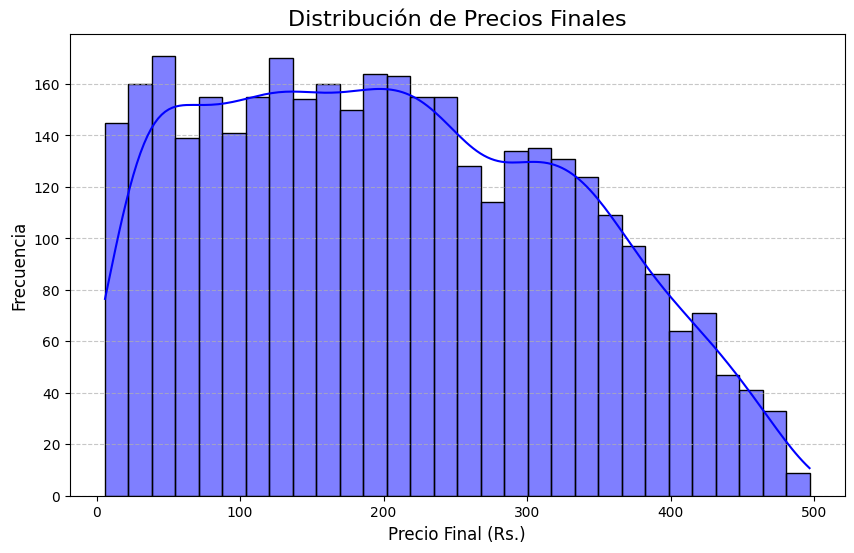

In [ ]:
#Distribución de precios finales (Univariado)

plt.figure(figsize=(10, 6))
sns.histplot(df['Final_Price(Rs.)'], bins=30, kde=True, color='blue')
plt.title('Distribución de Precios Finales', fontsize=16)
plt.xlabel('Precio Final (Rs.)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

El rango de precio más común es aproximadamente: 259.1 Rs.
Y los productos fuera de la tendencia son:
      Product_ID  Final_Price(Rs.)
13    eeb0635d-a             13.13
16    928b4b24-d            426.75
21    4c021051-3             21.45
32    411c40d9-1             20.39
36    7f05dd28-6             18.13
...          ...               ...
3559  909a3085-c             19.08
3609  9e0e3d1d-9             25.76
3610  585b0773-2            484.56
3649  c957a166-d            419.32
3655  28714133-6            486.79

[366 rows x 2 columns]


<ipython-input-20-c61f3bbb67a3>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Final_Price(Rs.)', data=df, palette='Set3')


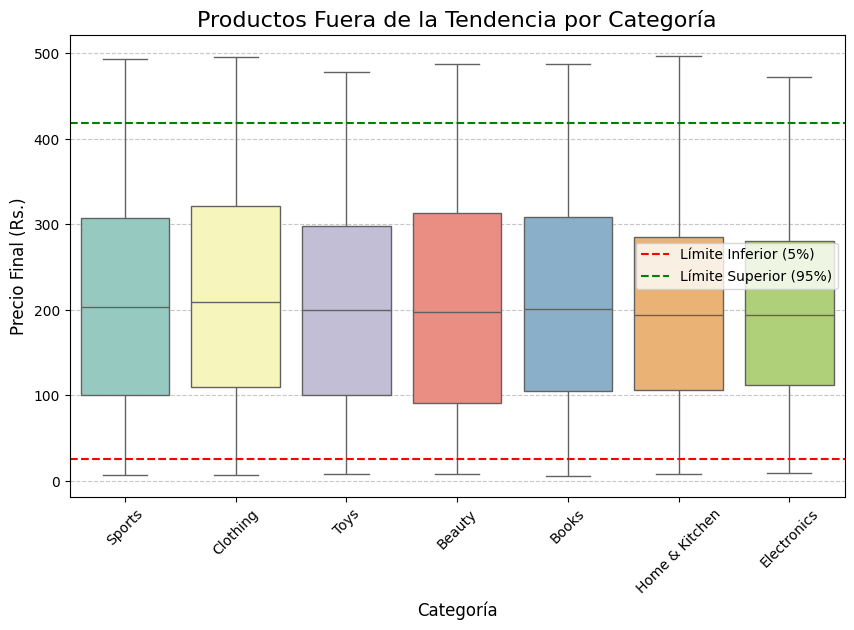

In [ ]:
#Diagnóstico:
rango_comun = df['Final_Price(Rs.)'].mode()
print(f"El rango de precio más común es aproximadamente: {rango_comun[0]} Rs.")

limite_inferior = df['Final_Price(Rs.)'].quantile(0.05)
limite_superior = df['Final_Price(Rs.)'].quantile(0.95)

productos_fuera_tendencia = df[(df['Final_Price(Rs.)'] < limite_inferior) | (df['Final_Price(Rs.)'] > limite_superior)]
print("Y los productos fuera de la tendencia son:")
print(productos_fuera_tendencia[['Product_ID', 'Final_Price(Rs.)']])

plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Final_Price(Rs.)', data=df, palette='Set3')
plt.axhline(y=limite_inferior, color='red', linestyle='--', label='Límite Inferior (5%)')
plt.axhline(y=limite_superior, color='green', linestyle='--', label='Límite Superior (95%)')
plt.legend()
plt.title("Productos Fuera de la Tendencia por Categoría", fontsize=16)
plt.xlabel("Categoría", fontsize=12)
plt.ylabel("Precio Final (Rs.)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

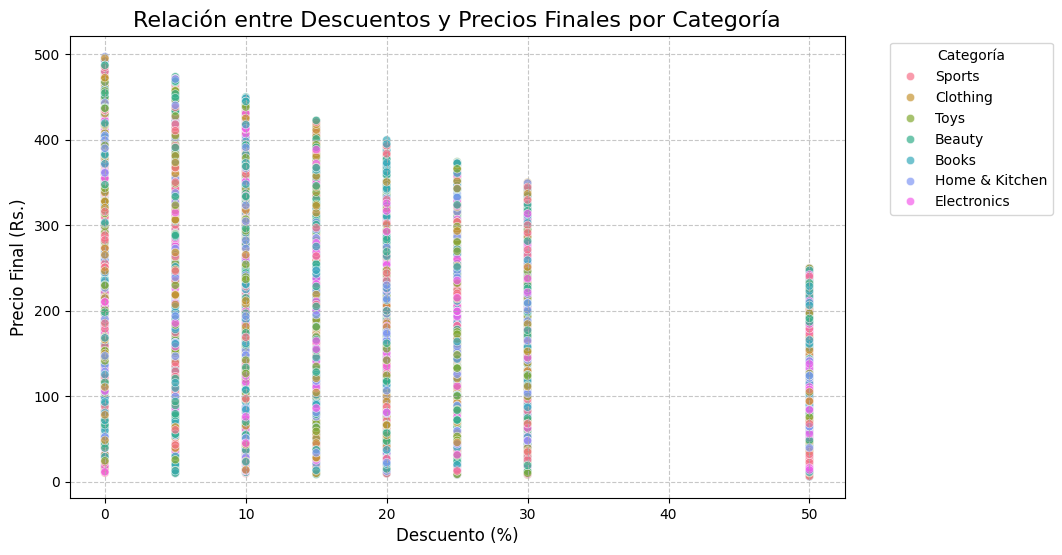

In [ ]:
#Relación entre descuentos y precios finales por categoría (Multivariado)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount (%)', y='Final_Price(Rs.)', hue='Category', data=df, alpha=0.7, palette='husl')
plt.title('Relación entre Descuentos y Precios Finales por Categoría', fontsize=16)
plt.xlabel('Descuento (%)', fontsize=12)
plt.ylabel('Precio Final (Rs.)', fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<ipython-input-22-9112dca95700>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Discount(%)', data=df, palette='Set3')


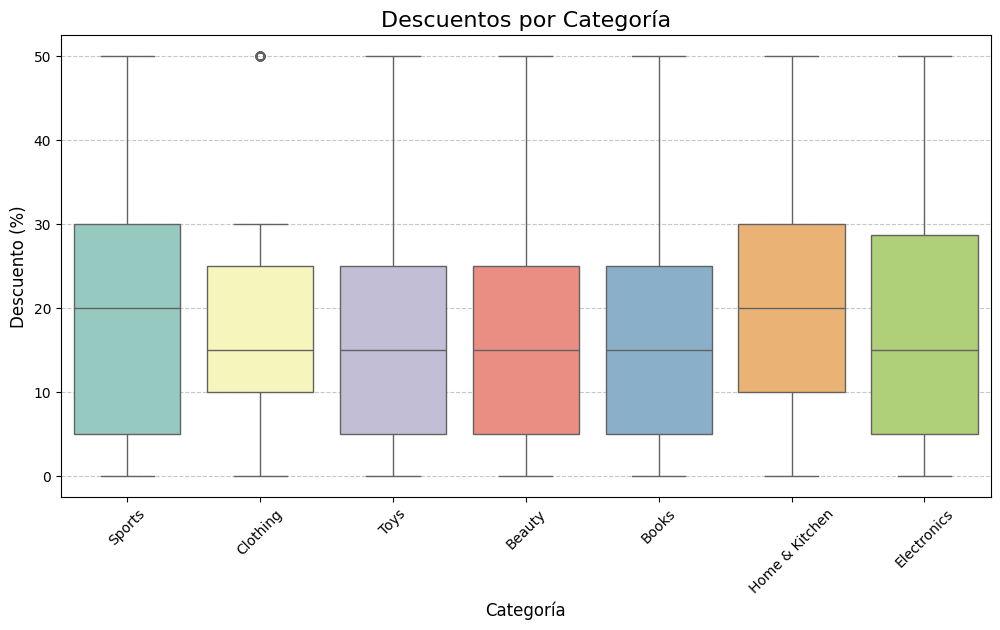

In [ ]:
df['Discount(%)'] = ((df['Price (Rs.)'] - df['Final_Price(Rs.)']) / df['Price (Rs.)']) * 100

plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Discount(%)', data=df, palette='Set3')
plt.title("Descuentos por Categoría", fontsize=16)
plt.xlabel("Categoría", fontsize=12)
plt.ylabel("Descuento (%)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Agrupar los datos por categoría
descuentos_por_categoria = [df[df['Category'] == cat]['Discount(%)'] for cat in df['Category'].unique()]

# Comparación de las medias de descuento entre categorías
stat, p_value = f_oneway(*descuentos_por_categoria)

print(f"F-Estadístico: {stat}")
print(f"Valor p: {p_value}")

# Interpretación
if p_value < 0.05:
    print("Existen diferencias significativas en los descuentos entre las categorías.")
else:
    print("No se encontraron diferencias significativas en los descuentos entre las categorías.")


F-Estadístico: 1.0301411522887436
Valor p: 0.4034398030564088
No se encontraron diferencias significativas en los descuentos entre las categorías.


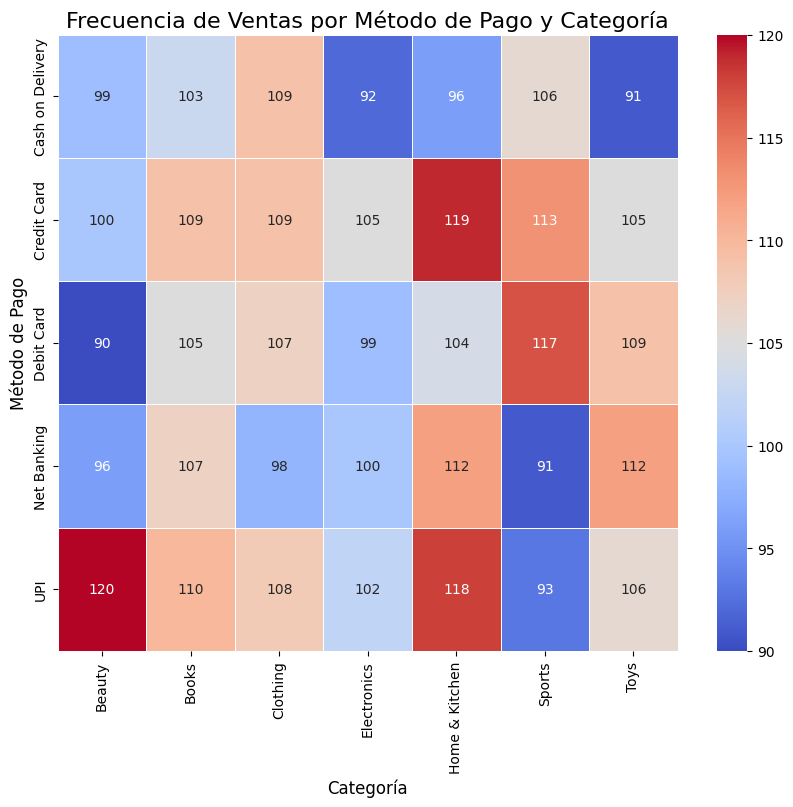

In [ ]:
#Frecuencia de ventas por método de pago y categoría
payment_category = df.pivot_table(index='Payment_Method', columns='Category', values='Final_Price(Rs.)', aggfunc='count')

plt.figure(figsize=(10, 8))
sns.heatmap(payment_category, annot=True, fmt=".0f", cmap='coolwarm', linewidths=0.5)
plt.title('Frecuencia de Ventas por Método de Pago y Categoría', fontsize=16)
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Método de Pago', fontsize=12)
plt.show()


El análisis del heatmap revela los siguientes patrones en la relación entre las categorías de productos y los métodos de pago preferidos por los consumidores:

- Belleza: El método de pago más utilizado es UPI
- Libros: UPI es el método predominante, seguido de cerca por Credit Card.
- Ropa: Los consumidores prefieren Cash como método principal, seguido por Credit Card.
- Electrónica: Aquí se destacan Credit Card y UPI como los métodos de pago más frecuentes.
- Hogar y Cocina: Credit Card lidera en esta categoría, con UPI ocupando el segundo lugar.
- Deportes: La mayoría de las transacciones se realizan con Debit Card, seguido de Credit Card.
- Juguetes: En esta categoría, el método preferido es Net Banking, seguido de Debit Card.


**3.** Vincular los gráficos y análisis numéricos hechos hasta el momento con las preguntas de interés.
- Las categorías más populares en términos de ventas son Home & Kitchen, seguido de Books y Clothing (véase el gráfico de Cantidad de Productos Vendidos por Categoría de la actividad integradora Visualizaciones en Python)
- Como el valor p del ANOVA es menor a 0.05 no hay diferencias significativas en los descuentos entre las categorías (véase gráfico de Relación entre Descuentos y Precios Finales por Categoría y de Descuentos por categoría).
- El método de pago preferido según categoría del producto está respondido en el Heatmap del punto 2.
- Existen patrones temporales en las compras, llegando a su punto más alto en octubre, seguido de abril y julio (véase el gráfico de Evolución de las Ventas Mensuales de la actividad integradora Visualizaciones en Python).


**4.** Identificación de valores perdidos:

Filas con valores nulos:
 Empty DataFrame
Columns: [User_ID, Product_ID, Category, Price (Rs.), Discount (%), Final_Price(Rs.), Payment_Method, Purchase_Date, Discount(%)]
Index: []


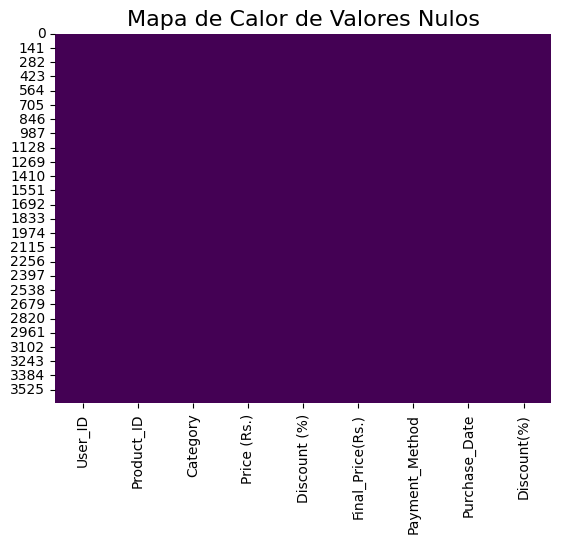

In [ ]:
# Filas con valores nulos
missing_data = df[df.isnull().any(axis=1)]
print("Filas con valores nulos:\n", missing_data)

# Visualización de valores nulos
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Calor de Valores Nulos', fontsize=16)
plt.show()


# **Actividad Práctica: Estudio de Modelos Analíticos**

**1. Abstracto**

Este estudio analiza los datos de un e-commerce en India con el objetivo de identificar patrones de compra,
el impacto de los descuentos en las ventas y las preferencias de pago. A través de un análisis exploratorio
de datos (EDA) y modelos analíticos, buscamos responder preguntas clave sobre el comportamiento del consumidor de dicho e-commerce.

**2. Preguntas / Hipótesis**

Preguntas =
- ¿Qué categorías de productos tienen mayor demanda?
- ¿Cómo afectan los descuentos al precio final y al volumen de ventas?
- ¿Existen diferencias en el uso de métodos de pago según la categoría?


Hipótesis =
- Los productos con mayores descuentos tienen un mayor volumen de ventas.
- Los métodos de pago electrónicos son preferidos para categorías de alto precio como electrónica.
- Los descuentos aplicados afectan de manera distinta a cada categoría de producto.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           3660 non-null   object 
 1   Product_ID        3660 non-null   object 
 2   Category          3660 non-null   object 
 3   Price (Rs.)       3660 non-null   float64
 4   Discount (%)      3660 non-null   int64  
 5   Final_Price(Rs.)  3660 non-null   float64
 6   Payment_Method    3660 non-null   object 
 7   Purchase_Date     3660 non-null   object 
 8   Discount(%)       3660 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 257.5+ KB
None
       Price (Rs.)  Discount (%)  Final_Price(Rs.)  Discount(%)
count  3660.000000   3660.000000       3660.000000  3660.000000
mean    254.800675     18.825137        206.906579    18.825133
std     141.682621     14.731338        122.687844    14.731338
min      10.090000      0.000000          5.890000  

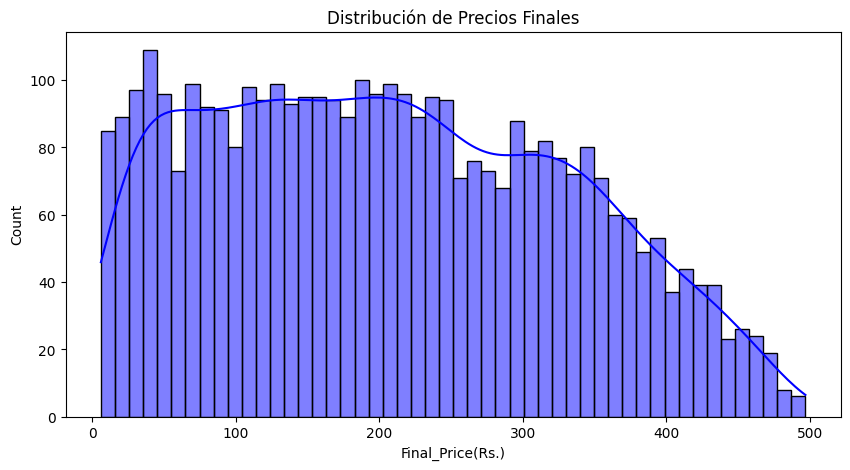

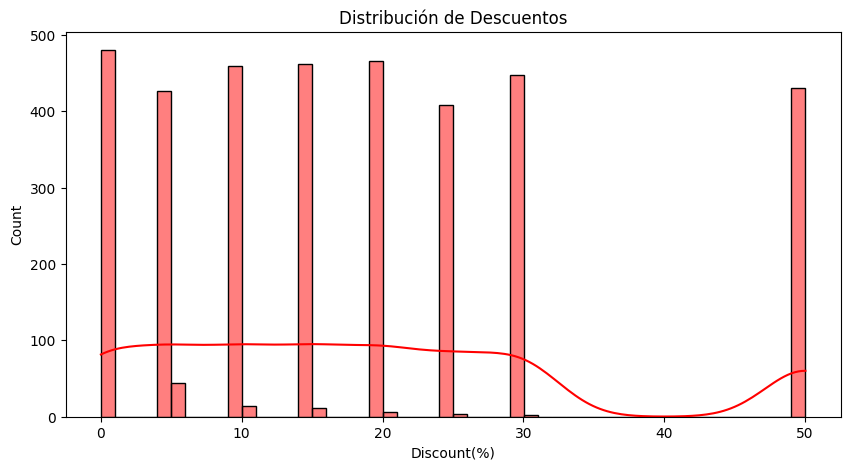

In [ ]:
# --- 3. Exploración de Datos (EDA) ---
## Resumen general del dataset
print(df.info())
print(df.describe())

## Valores nulos
def missing_values(df):
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    return missing

print(missing_values(df))

## Distribución de precios y descuentos
plt.figure(figsize=(10, 5))
sns.histplot(df['Final_Price(Rs.)'], bins=50, kde=True, color='blue')
plt.title("Distribución de Precios Finales")
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df['Discount(%)'], bins=50, kde=True, color='red')
plt.title("Distribución de Descuentos")
plt.show()

In [ ]:
# --- 4. Análisis de Correlación entre descuentos y precios ---
correlation, p_value = pearsonr(df['Discount(%)'], df['Final_Price(Rs.)'])
print(f"Correlación entre descuentos y precio final: {correlation:.2f}, p-valor: {p_value:.5f}")

Correlación entre descuentos y precio final: -0.31, p-valor: 0.00000


In [ ]:
# Calcular la media y la desviación estándar de los precios finales por nivel de descuento
stats_descuento = df.groupby('Discount(%)')['Final_Price(Rs.)'].agg(['mean', 'std']).reset_index()

# Mostrar los resultados
print(stats_descuento)

      Discount(%)       mean         std
0        0.000000  255.21625  136.521969
1        4.966642   12.82000         NaN
2        4.976427   18.14000         NaN
3        4.977664   14.89000         NaN
4        4.978749   15.65000         NaN
...           ...        ...         ...
2653    50.021959   11.38000         NaN
2654    50.022252   11.23000         NaN
2655    50.024050   10.39000         NaN
2656    50.026610    9.39000         NaN
2657    50.026838    9.31000         NaN

[2658 rows x 3 columns]


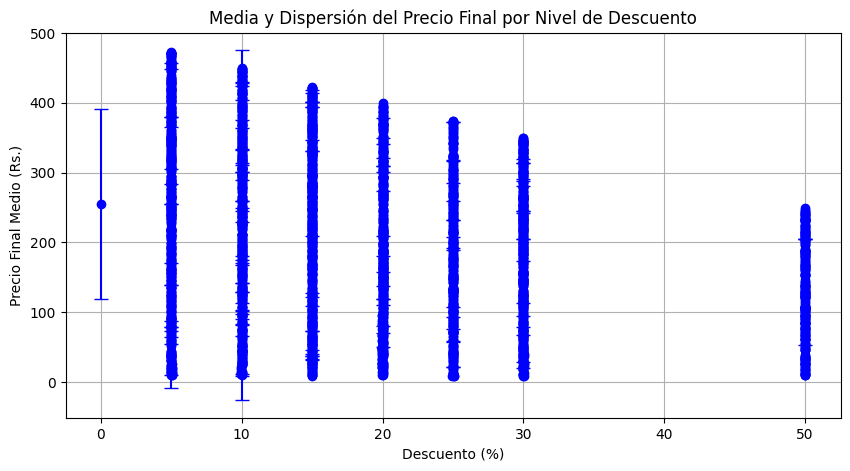

In [ ]:
plt.figure(figsize=(10, 5))
plt.errorbar(stats_descuento['Discount(%)'], stats_descuento['mean'], yerr=stats_descuento['std'], fmt='o', capsize=5, color='blue')
plt.xlabel('Descuento (%)')
plt.ylabel('Precio Final Medio (Rs.)')
plt.title('Media y Dispersión del Precio Final por Nivel de Descuento')
plt.grid()
plt.show()


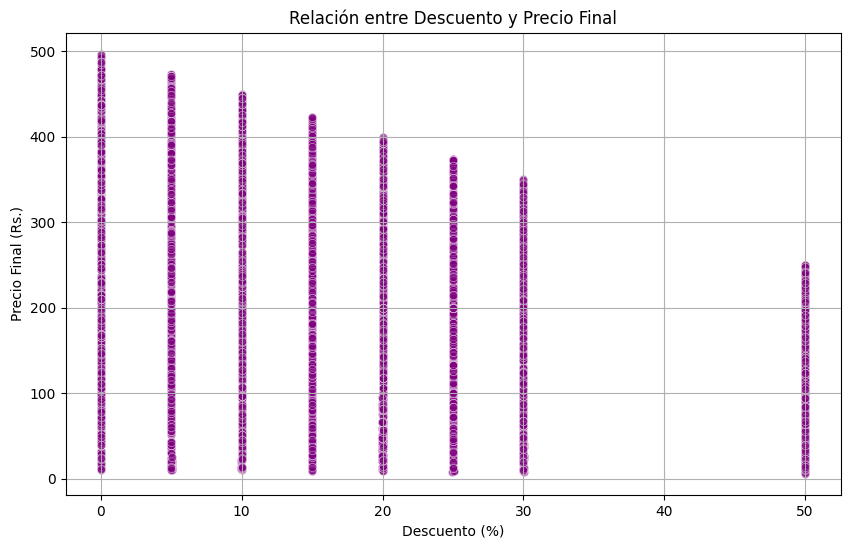

In [ ]:
# Gráfico de dispersión entre descuento y precio final
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Discount(%)'], y=df['Final_Price(Rs.)'], alpha=0.6, color='purple')
plt.title("Relación entre Descuento y Precio Final")
plt.xlabel("Descuento (%)")
plt.ylabel("Precio Final (Rs.)")
plt.grid()
plt.show()

<ipython-input-31-47babcb4fd34>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Discount_Range')['User_ID'].count().plot(kind='bar', color='skyblue', edgecolor='black')


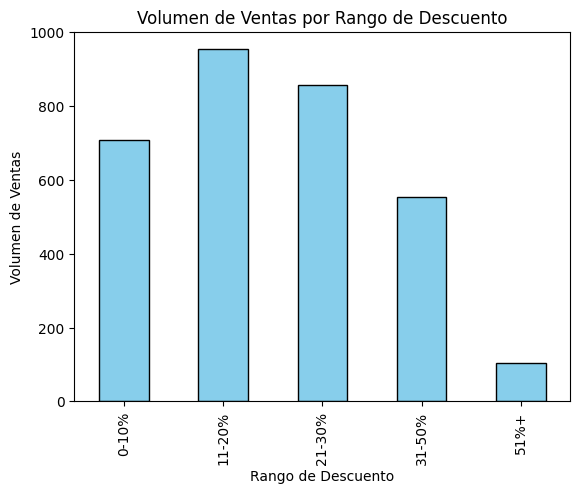

In [ ]:
# --- 5. Impacto de los descuentos en el volumen de ventas ---
df['Discount_Range'] = pd.cut(df['Discount(%)'], bins=[0, 10, 20, 30, 50, 100], labels=['0-10%', '11-20%', '21-30%', '31-50%', '51%+'])
df.groupby('Discount_Range')['User_ID'].count().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Volumen de Ventas por Rango de Descuento')
plt.xlabel('Rango de Descuento')
plt.ylabel('Volumen de Ventas')
plt.show()

In [ ]:
# --- 6. Comparación de descuentos por categoría (ANOVA) ---
descuentos_por_categoria = [df[df['Category'] == cat]['Discount(%)'] for cat in df['Category'].unique()]
stat, p_value = f_oneway(*descuentos_por_categoria)
print(f"F-Estadístico: {stat:.2f}, Valor p: {p_value:.5f}")

F-Estadístico: 1.03, Valor p: 0.40344


<ipython-input-33-2de9e0866ab6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Discount(%)', data=df, palette='coolwarm')


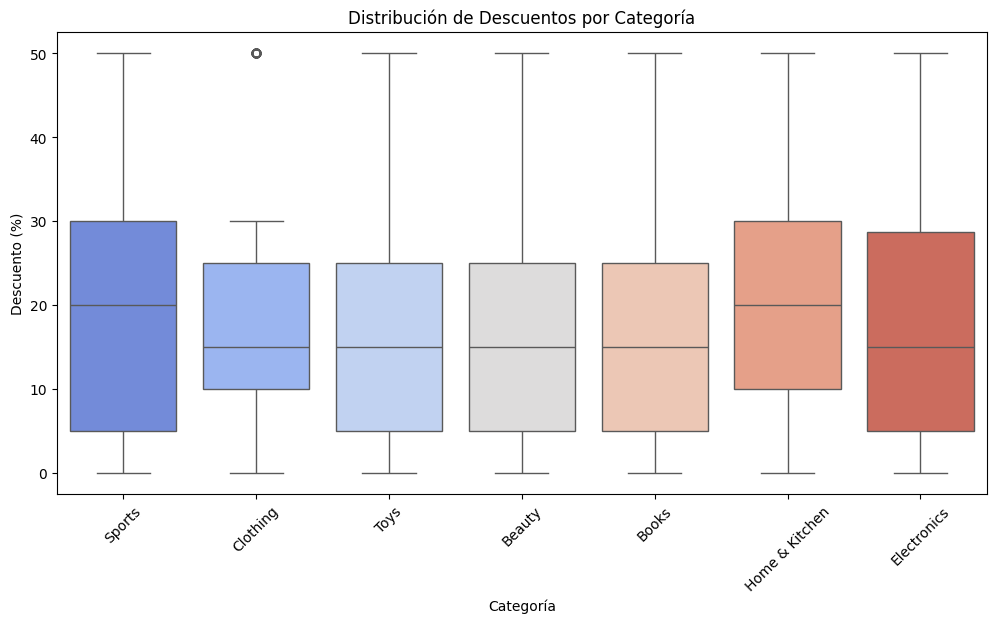

In [ ]:
# Gráfico de caja para comparar descuentos por categoría
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Discount(%)', data=df, palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Distribución de Descuentos por Categoría")
plt.xlabel("Categoría")
plt.ylabel("Descuento (%)")
plt.show()

In [ ]:
# --- 7. Recomendaciones ---
recomendaciones = """
1. Las categorías con mayor demanda deberían tener estrategias diferenciadas de descuento para maximizar ingresos.
2. Implementar promociones específicas según el comportamiento del consumidor por categoría.
3. Evaluar el impacto del método de pago en la conversión de ventas para ofrecer incentivos adicionales.
"""
print(recomendaciones)


1. Las categorías con mayor demanda deberían tener estrategias diferenciadas de descuento para maximizar ingresos.
2. Implementar promociones específicas según el comportamiento del consumidor por categoría.
3. Evaluar el impacto del método de pago en la conversión de ventas para ofrecer incentivos adicionales.



# **2° Entrega**
Crearás un notebook que complemente el trabajo realizado en los siguientes apartados: i) elegir un método de feature selection para reducir la dimensionalidad del dataset,

ii) elegir un algoritmo de regresión o clasificación para entrenar con los datos elegidos,

iii) cálculo de métricas básicas para validar el modelo

iv) generar conclusiones con base en los resultados obtenidos.

Aspectos a incluir

El código debe estar hecho en un notebook y debe estar probado.

Toda la entrega debe estar en su GitHub (notebook y base de datos).

Formato

Entregar un archivo con formato .ipynb. Debe tener el nombre "ProyectoPartelll+Apellido.ipynb"

Sugerencias

Preparar el código y probar los resultados con subconjuntos del conjunto original.

**Disclamer:**
A lo largo de este curso, trabajé sobre un mismo archivo, incorporando las actividades prácticas y la pre-entrega anterior. Para probar esta segunda entrega, primero hay que dirigirse a la primera sección, ejecutar las importaciones y cargar el dataset. Luego, se debe ejecutar la sección de Predicción Lineal, correspondiente a esta entrega final. Y de forma opcional, agradecería si pueden explorar la sección Clasificación, donde desarrollé un intento de predicción del Payment_Method.

Mi intención original era utilizar un modelo de clasificación para predecir el Payment_Method, pero encontré varias dificultades en el proceso y no supe cómo avanzar. Por esa razón, para cumplir con la consigna, opté por desarrollar un modelo de Predicción Lineal para estimar el Final Price (Rs.).

Aun así, me gustaría recibir sugerencias sobre cómo podría haber continuado con el modelo de clasificación. Agradecería cualquier comentario sobre cómo mejorar o corregir el enfoque para lograr una predicción efectiva del Payment_Method.

# Sección: Predicción Lineal, Final Price(Rs.)

i) Feature Selection - Reducción de dimensionalidad

In [ ]:
#Voy a seleccionar las características más relevantes para predecir el precio final utilizando SelectKBest.

# Hago una copia del dataset original para no modificarlo directamente
df_encoded = df.copy()

# Aplico One-Hot Encoding a 'Payment_Method' para convertirlo en variables numéricas
df_encoded = pd.get_dummies(df_encoded, columns=['Payment_Method'], drop_first=True)

# Defino las variables predictoras (X) y la variable objetivo (y)
X = df_encoded[['Price (Rs.)', 'Discount (%)'] + [col for col in df_encoded.columns if 'Payment_Method' in col]]
y = df_encoded['Final_Price(Rs.)']

# Uso SelectKBest para elegir las 3 características más importantes en relación con la variable objetivo
selector = SelectKBest(score_func=f_regression, k=3)
X_selected = selector.fit_transform(X, y)

# Muestro qué variables fueron seleccionadas para el modelo
selected_features = X.columns[selector.get_support()]
print("Variables seleccionadas:", selected_features)

Variables seleccionadas: Index(['Price (Rs.)', 'Discount (%)', 'Payment_Method_Debit Card'], dtype='object')


Como podemos observar, las variables más importantes para predecir el precio final en el modelo de reducción de dimensionalidad son Price (Rs.), Discount (%) y Payment_Method_Debit Card.

ii) Entrenar el modelo de regresión

In [ ]:
#Voy a entrenar un modelo de regresión lineal con las características seleccionadas.
# Divido los datos en entrenamiento (80%) y prueba (20%) para evaluar el rendimiento del modelo
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Creo un modelo de regresión lineal
lr_model = LinearRegression()

# Entreno el modelo con los datos de entrenamiento
lr_model.fit(X_train, y_train)

# Hago predicciones sobre el conjunto de prueba
y_pred = lr_model.predict(X_test)

iii) Cálculo de métricas básicas

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculo el error cuadrático medio (MSE), que mide cuánto se desvían las predicciones de los valores reales
mse = mean_squared_error(y_test, y_pred)

# Calculo el R², que indica qué porcentaje de la variabilidad del precio final puede ser explicada por el modelo
r2 = r2_score(y_test, y_pred)

# Muestro las métricas obtenidas
print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

Mean Squared Error: 511.925872854069
R2 Score: 0.9648076562084215


iv) Generar conclusiones basadas en los resultados:

In [ ]:
# Agrupar por método de pago y calcular el descuento promedio y máximo
descuento_por_pago = df.groupby("Payment_Method")["Discount (%)"].agg(["mean", "max", "count"]).reset_index()

# Renombrar columnas para mejor interpretación
descuento_por_pago.columns = ["Método de Pago", "Descuento Promedio (%)", "Descuento Máximo (%)", "Cantidad de Compras"]

# Ordenar por descuento promedio de mayor a menor
descuento_por_pago = descuento_por_pago.sort_values(by="Descuento Promedio (%)", ascending=False)

# Mostrar resultados
print(descuento_por_pago)

     Método de Pago  Descuento Promedio (%)  Descuento Máximo (%)  \
3       Net Banking               19.664804                    50   
4               UPI               19.062087                    50   
2        Debit Card               18.584131                    50   
0  Cash on Delivery               18.534483                    50   
1       Credit Card               18.296053                    50   

   Cantidad de Compras  
3                  716  
4                  757  
2                  731  
0                  696  
1                  760  


In [ ]:
corr_matrix = np.abs(X.corr())  # Matriz de correlaciones absolutas
print(corr_matrix)

                            Price (Rs.)  Discount (%)  \
Price (Rs.)                    1.000000      0.003473   
Discount (%)                   0.003473      1.000000   
Payment_Method_Credit Card     0.011664      0.018389   
Payment_Method_Debit Card      0.011832      0.008174   
Payment_Method_Net Banking     0.001010      0.028113   
Payment_Method_UPI             0.008421      0.008215   

                            Payment_Method_Credit Card  \
Price (Rs.)                                   0.011664   
Discount (%)                                  0.018389   
Payment_Method_Credit Card                    1.000000   
Payment_Method_Debit Card                     0.255745   
Payment_Method_Net Banking                    0.252462   
Payment_Method_UPI                            0.261416   

                            Payment_Method_Debit Card  \
Price (Rs.)                                  0.011832   
Discount (%)                                 0.008174   
Payment_Method_Credit 

In [ ]:
print("\nConclusiones:")

if r2 < 0.5:
    print("Mi modelo no logra predecir bien el precio final. Posiblemente falten variables importantes o necesite un mejor algoritmo.")
elif 0.5 <= r2 < 0.7:
    print(" Mi modelo tiene una precisión moderada. Puede ser útil en algunos casos, pero hay margen de mejora.")
elif r2 >= 0.7:
    print("Mi modelo es bastante preciso y explica bien la variabilidad del precio final.")


Conclusiones:
Mi modelo es bastante preciso y explica bien la variabilidad del precio final.


Dado que el modelo presenta un R² de 0.96, se puede afirmar que explica el 96% de la variabilidad del precio final en función de las variables seleccionadas. Esto indica que el precio final depende en gran medida del descuento aplicado y del precio original.  

A partir de estos resultados, podrían implementarse estrategias de precios personalizados basadas en el historial de compras de los clientes, en el caso de que tuviese más datos sobre esto. Además, se podría identificar qué tipos de clientes responden mejor a determinados descuentos, pudiendo así realizar ofertas personalizadas para maximizar las ventas.  

Por otro lado, también se pueden diseñar promociones específicas vinculadas a ciertos métodos de pago, como el pago en efectivo, ya que, si bien es el menos utilizado, la diferencia en volumen de ventas con respecto a otros métodos no es significativa. En caso de que se busque incentivar su uso, se podrían ofrecer descuentos exclusivos para este método.  

Finalmente, dado que el modelo predice con precisión el precio final, podría utilizarse en simulaciones para evaluar el impacto de diferentes estrategias de descuento en la rentabilidad del e-commerce, permitiendo tomar decisiones informadas sobre las políticas de precios y promociones.

# Sección: Clasificación, predicción de Payment_Method

i)

In [ ]:
#Comenzaré por eliminar las columnas irrelevantes como User_id y Product_ID. Ya que al ser datos que no se repiten no son útiles para intentar predecir el método de pago que podría llegar a utilizar un cliente
df.drop(columns=['User_ID', 'Product_ID'], inplace=True)

# A su vez, transformaré Purchase_Date en un entero que represente el mes
df['Purchase_Month'] = pd.to_datetime(df['Purchase_Date'], dayfirst=True).dt.month

# Elimino la columna original de fecha
df.drop(columns=['Purchase_Date'], inplace=True)

print(df.head())



   Category  Price (Rs.)  Discount (%)  Final_Price(Rs.) Payment_Method  \
0    Sports        36.53            15             31.05    Net Banking   
1  Clothing       232.79            20            186.23    Net Banking   
2    Sports       317.02            25            237.76    Credit Card   
3      Toys       173.19            25            129.89            UPI   
4    Beauty       244.80            20            195.84    Net Banking   

   Purchase_Month  
0              11  
1               2  
2               9  
3               4  
4               9  


In [ ]:
# Discretizo Price y Discount
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
df[['Price (Rs.)', 'Discount (%)']] = discretizer.fit_transform(df[['Price (Rs.)', 'Discount (%)']])

# Aplico One-Hot Encoding a variables categóricas
df_encoded = pd.get_dummies(df, columns=['Category', 'Payment_Method'], drop_first=False)

# Verifico que todas las categorías se codificaron correctamente
print(df_encoded.filter(like='Payment_Method').columns)

Index(['Payment_Method_Cash on Delivery', 'Payment_Method_Credit Card',
       'Payment_Method_Debit Card', 'Payment_Method_Net Banking',
       'Payment_Method_UPI'],
      dtype='object')


In [ ]:
#Voy a utilizar Chi Cuadrado como primer método de Feature Selection, evaluando la relación entre las variables categóricas (Category, Payment_Method) y la variable objetivo.
# Antes Discretizo Price y Discount en 5 categorías
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
df_encoded[['Price (Rs.)', 'Discount (%)']] = discretizer.fit_transform(df_encoded[['Price (Rs.)', 'Discount (%)']])

# Luego convierto las variables categóricas en números (One-Hot Encoding)
df_encoded = pd.get_dummies(df, columns=['Category', 'Payment_Method'], drop_first=False)

# Separo las características (X) y variable objetivo (y)
X = df_encoded.drop(columns=['Payment_Method_Cash on Delivery', 'Payment_Method_Credit Card','Payment_Method_Debit Card', 'Payment_Method_Net Banking', 'Payment_Method_UPI'])
y = df_encoded[['Payment_Method_Cash on Delivery', 'Payment_Method_Credit Card','Payment_Method_Debit Card', 'Payment_Method_Net Banking', 'Payment_Method_UPI']].idxmax(axis=1)

# Aplico Chi-cuadrado
chi2_selector = SelectKBest(chi2, k=5)  # Selecciono las 5 mejores variables
X_chi2 = chi2_selector.fit_transform(X, y)

# Muestro las características seleccionadas
selected_features = X.columns[chi2_selector.get_support()]
print("Mejores características según Chi-cuadrado:", selected_features)

Mejores características según Chi-cuadrado: Index(['Discount (%)', 'Final_Price(Rs.)', 'Purchase_Month', 'Category_Beauty',
       'Category_Sports'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(


<Axes: title={'center': 'Top 10 características más importantes'}>

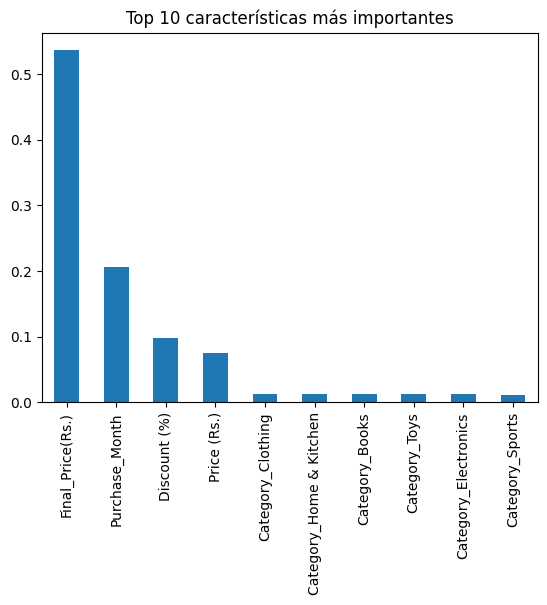

In [ ]:
#Como segundo metodo de Feature Selection utilizaré Random Forest

# Entreno un Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Obtengo importancias
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = feature_importances.sort_values(ascending=False).head(10)  # Muestra solo las 10 más importantes
top_features.plot(kind='bar', title='Top 10 características más importantes')


In [ ]:
#Por último aplicaré un RFE (Recursive Feature Elimination)
# Aplico RFE con Random Forest
rfe_selector = RFE(estimator=RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=5)
X_rfe = rfe_selector.fit_transform(X, y)

# Muestro las características seleccionadas
selected_features_rfe = X.columns[rfe_selector.support_]
print("Características seleccionadas por RFE:", selected_features_rfe)

Características seleccionadas por RFE: Index(['Price (Rs.)', 'Discount (%)', 'Final_Price(Rs.)', 'Purchase_Month',
       'Category_Books'],
      dtype='object')


Las características que utilizaré para entrenar el modelo de clasificación con el objetivo de predecir el método de pago (Payment_Method) son: Purchase_Month, Discount (%), Price (Rs.), Category_Books y Category_Electronics. La selección de estas variables se basa en la aplicación de tres técnicas de reducción de dimensionalidad: Chi-cuadrado, Importancia de Random Forest y RFE con Random Forest.

Purchase_Month aparece en los tres métodos, lo que indica que el mes de compra es un fuerte predictor del método de pago.
Discount (%) también es seleccionado por los tres métodos, lo que sugiere que los descuentos influyen en la decisión de pago.
Price (Rs.), identificado tanto por Random Forest como por RFE, refleja la relación entre el precio y la elección del método de pago.
Category_Books y Category_Electronics, seleccionados por RFE, indican que la categoría del producto influye en la forma de pago elegida.









ii)

In [ ]:
# Variables seleccionadas
selected_features = ['Purchase_Month', 'Final_Price(Rs.)', 'Category_Books', 'Category_Electronics', 'Category_Home & Kitchen', 'Category_Toys', 'Category_Beauty', 'Category_Sports', 'Price (Rs.)']

# Defino X e y
X = df_encoded[selected_features]
y = df_encoded[['Payment_Method_Cash on Delivery', 'Payment_Method_Credit Card',
                'Payment_Method_Debit Card', 'Payment_Method_Net Banking', 'Payment_Method_UPI']].idxmax(axis=1)

# Divido en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Entreno el modelo
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predicciones
y_pred = clf.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

Precisión del modelo: 0.2445
                                 precision    recall  f1-score   support

Payment_Method_Cash on Delivery       0.21      0.20      0.21       139
     Payment_Method_Credit Card       0.31      0.25      0.28       152
      Payment_Method_Debit Card       0.24      0.29      0.26       146
     Payment_Method_Net Banking       0.23      0.23      0.23       143
             Payment_Method_UPI       0.23      0.25      0.24       152

                       accuracy                           0.24       732
                      macro avg       0.25      0.24      0.24       732
                   weighted avg       0.25      0.24      0.24       732



Como la precisión del modelo ronda el 20% y esto es muy poco, ya que si el modelo dijese un método de pago al azar, también acertaría 1/5 de las veces. Por eso repetiré el modelo utilizando el resto de las categorías como features en lugar de sólo utilizar Category_Books y Category_Electronics para ver si con eso logro incrementar su precisión:

In [ ]:
# Variables seleccionadas
selected_features = ['Purchase_Month', 'Discount (%)', 'Price (Rs.)', 'Category_Books', 'Category_Electronics', 'Category_Clothing', 'Category_Home & Kitchen', 'Category_Toys', 'Category_Beauty', 'Category_Sports']

# Defino X e y
X = df_encoded[selected_features]
y = df_encoded[['Payment_Method_Cash on Delivery', 'Payment_Method_Credit Card',
                'Payment_Method_Debit Card', 'Payment_Method_Net Banking', 'Payment_Method_UPI']].idxmax(axis=1)

# Divido en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Entreno el modelo
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predicciones
y_pred = clf.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

Precisión del modelo: 0.1831
                                 precision    recall  f1-score   support

Payment_Method_Cash on Delivery       0.18      0.19      0.19       139
     Payment_Method_Credit Card       0.20      0.19      0.19       152
      Payment_Method_Debit Card       0.17      0.17      0.17       146
     Payment_Method_Net Banking       0.19      0.17      0.18       143
             Payment_Method_UPI       0.17      0.18      0.18       152

                       accuracy                           0.18       732
                      macro avg       0.18      0.18      0.18       732
                   weighted avg       0.18      0.18      0.18       732



Como incrementé el número de features pero esto disminuyó aún más la precisión del modelo, el problema no parece tratarse de una falta de features. Probaré verificando si los datos están desbalanceados y en el caso de estarlo, los balancearé:

<ipython-input-109-38020948097b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


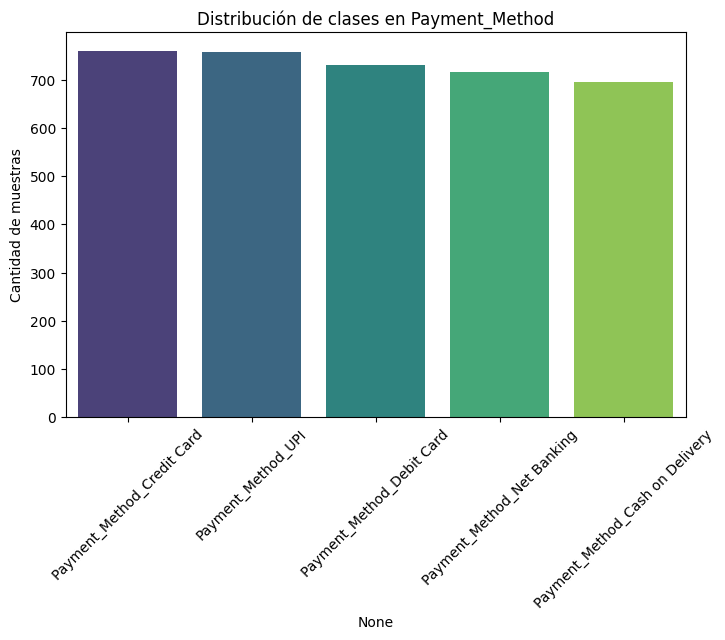

Payment_Method_Credit Card         760
Payment_Method_UPI                 757
Payment_Method_Debit Card          731
Payment_Method_Net Banking         716
Payment_Method_Cash on Delivery    696
Name: count, dtype: int64


In [ ]:
# Conteo de cada categoría en el target
class_counts = y.value_counts()

# Gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.xticks(rotation=45)
plt.ylabel("Cantidad de muestras")
plt.title("Distribución de clases en Payment_Method")
plt.show()

# Muestro el conteo en números
print(class_counts)

Como el incrementar el número de features no resultó, probaré agrupando los métodos de pago y además intentaré crear una nueva feature que represente el rango de precio.

In [ ]:
importances = clf.feature_importances_
feature_names = X_train.columns
sorted(zip(importances, feature_names), reverse=True)


[(0.44176016952796116, 'Purchase_Month'),
 (0.2416554436045856, 'Price (Rs.)'),
 (0.19343397708942475, 'Discount (%)'),
 (0.019598590109512055, 'Category_Toys'),
 (0.01914923008736363, 'Category_Clothing'),
 (0.017895078900002557, 'Category_Electronics'),
 (0.017826491238927503, 'Category_Home & Kitchen'),
 (0.017507527329405866, 'Category_Beauty'),
 (0.0172762955127865, 'Category_Books'),
 (0.0138971966000304, 'Category_Sports')]

In [ ]:
# One-Hot Encoding para 'Category'
df_encoded = pd.get_dummies(df, columns=['Category'], prefix='Category')

# Crear 'Price Range'
def categorize_price(price):
    if price < 1000:
        return 'Low'
    elif 1000 <= price < 2000:
        return 'Moderate'
    else:
        return 'High'

df_encoded['Price Range'] = df_encoded['Price (Rs.)'].apply(categorize_price)

# Variables seleccionadas
selected_features = ['Purchase_Month', 'Final_Price(Rs.)', 'Price (Rs.)',
                     'Price Range'] + [col for col in df_encoded.columns if col.startswith('Category_')]

# Aplico One-Hot Encoding a 'Price Range'
X = pd.get_dummies(df_encoded[selected_features], columns=['Price Range'], drop_first=False)

In [ ]:
print(df_encoded.columns)

Index(['Price (Rs.)', 'Discount (%)', 'Final_Price(Rs.)', 'Payment_Method',
       'Purchase_Month', 'Category_Beauty', 'Category_Books',
       'Category_Clothing', 'Category_Electronics', 'Category_Home & Kitchen',
       'Category_Sports', 'Category_Toys', 'Price Range'],
      dtype='object')


In [ ]:
df_encoded['Payment_Grouped'] = df['Payment_Method'].map({
    'Credit Card': 'Card',
    'Debit Card': 'Card',
    'Cash': 'Cash',
    'UPI': 'Digital',
    'Net Banking': 'Digital'
})

# Transformo la variable 'Payment_Grouped' en valores numéricos
le = LabelEncoder()
df_encoded['Payment_Grouped'] = le.fit_transform(df_encoded['Payment_Grouped'])

# Obtengo los nombres de las clases
target_names = [str(cls) for cls in le.classes_]

# Defino la variable objetivo
y = df_encoded['Payment_Grouped']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Entreno el modelo
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predicciones
y_pred = clf.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.4f}')
print(classification_report(y_test, y_pred, target_names=target_names))

Precisión del modelo: 0.3743
              precision    recall  f1-score   support

        Card       0.41      0.41      0.41       298
     Digital       0.41      0.45      0.43       295
         nan       0.18      0.14      0.16       139

    accuracy                           0.37       732
   macro avg       0.33      0.33      0.33       732
weighted avg       0.37      0.37      0.37       732



Vemos que si bien la precisión del modelo incrementó, todavía está muy lejos de ser útil para predecir el target Payment_Method